# 동그라미 2팀 - pathology analysis tool and solution
* with 김범채 랩장, 곽민섭 교수님, 양경성 부장님
* 사단법인 한국인공지능연구소
* 2018.08.25 ~ 2018.11.24

## 1. OpenSlide 코드 분석 notebook
* Writed by BCKim
* 2018.08.25 ~ 
* raretiger8@gmail.com

### openslide : aperio 에서 제공하는 디지털 조직 슬라이드 영상형식('.svs')을 다루기 위한 library
* support OS: Window, Linux, MacOS
* support language: Python, C++, Java, ... 
* Specially, anaconda can handle the library.

In [1]:
import openslide
from openslide import open_slide, ImageSlide
from openslide.deepzoom import DeepZoomGenerator as dzg
import matplotlib.pyplot as plt
import numpy as np

DEEP_PathologyIMGPath = './TCGA-A6-5662-01Z-00-DX1.82569684-1c31-4346-af9b-c296a020f624.svs'
SMP_PathologyIMGPath = './CMU-1-Small-Region.svs'

### Image load 
* the slide image loaded by PIL.Image.Image object 

In [2]:
slide = open_slide(DEEP_PathologyIMGPath)
slide2 = open_slide(SMP_PathologyIMGPath)
dzImage = dzg(slide)

In [3]:
print(openslide.PROPERTY_NAME_VENDOR)

print(slide.level_count)
print(slide.dimensions)

print(slide.level_dimensions[0])
print(slide.level_dimensions[1])
print(slide.level_dimensions[2])
print(slide.level_dimensions[3])

# 0 level image dimensions 기준 축소 or 확대된 정도 값 
print(slide.level_downsamples[0]) # 약 1배 축소
print(slide.level_downsamples[1]) # 약 4배 축소
print(slide.level_downsamples[2]) # 약 16배 축소
print(slide.level_downsamples[3]) # 약 32배 축소

print(slide.associated_images['thumbnail'].size)
print(slide.get_thumbnail(slide.associated_images['thumbnail'].size).size)
print(slide2.associated_images['thumbnail'].size)
print(slide2.get_thumbnail(slide2.associated_images['thumbnail'].size).size)
# print(slide.detect_format(DEEP_PathologyIMGPath))
# print(slide.read_region(location=(0,0), level=4, size=slide.associated_images['thumbnail'].size))

openslide.vendor
4
(24940, 77194)
(24940, 77194)
(6235, 19298)
(1558, 4824)
(779, 2412)
1.0
4.000051818841331
16.00488757538793
32.00977515077586
(248, 768)
(248, 767)
(574, 768)
(574, 767)


### Thumbnail image
* we can show the thumbnail image using slide associated_images or get_thumbnail('size') def. 
* In this case we can load a basic level of slice image.
* the difference between two method is loaded image size

(-0.5, 573.5, 767.5, -0.5)

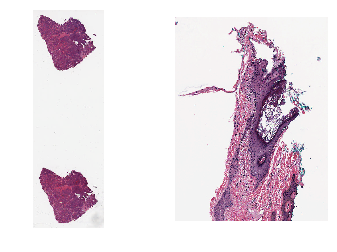

In [4]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(slide.associated_images['thumbnail'])
ax[0].axis('off')
ax[1].imshow(slide2.associated_images['thumbnail'])
ax[1].axis('off')

### Deep zoom generator 
* Deep zoom is library to make high resolution image for small pathology slide
* Deep zoom library 에서 제공되는 library
* tile 의 address 를 계산 하는 방법을 찾아야함
* 원하는 배율의 level 계산 법을 찾아야 함

In [5]:
# tile_size = tile_size + 2 * overlap (2의 배수를 추천함)
dzgImage = dzg(slide)

In [6]:
print(dzImage.get_dzi) # get metadata for '.dzi' file

print(dzImage.level_count) # The number of Deep zoom levels
print(dzImage.level_tiles[1]) 
# level_tiles[k] k level 에서의 tile 수 
# return A list of (tiles_x, tiles_y) tuples

print(dzImage.level_dimensions[0]) # level_dimensions[k] the dimensions of level k
# return  A list of (pixels_x, pixels_y) tuples
# print(dzImage.tile_count)

<bound method DeepZoomGenerator.get_dzi of DeepZoomGenerator(OpenSlide('./TCGA-A6-5662-01Z-00-DX1.82569684-1c31-4346-af9b-c296a020f624.svs'), tile_size=254, overlap=1, limit_bounds=False)>
18
(1, 1)
(1, 1)


## def. get_tile(level)
* 현재까지 library를 정리한 바에 의하면 get_tile 에서 address값을 어떻게 받아 오는 가에 따라 다양한 level의 영상 display 가 가능함. 

50 152
12470 38597


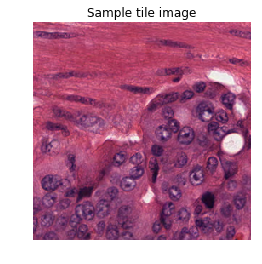

<bound method Image.getchannel of <PIL.Image.Image image mode=RGB size=256x256 at 0x10AA9E5C0>>


In [15]:
from PIL import Image

level = [15, 16, 17]

tiles_x, tiles_y = dzImage.level_tiles[level[1]]
print(tiles_x, tiles_y)

pixels_x, pixels_y = dzImage.level_dimensions[level[1]]
print(pixels_x, pixels_y)

# print(slide.level_downsamples[level])
img = dzImage.get_tile(level=level[1], address=(14,18))

plt.imshow( img )
plt.axis('off')
plt.title('Sample tile image')
plt.show()

print(img.getchannel)
# for l in level:
#     levelname = 'level_%d' % (l)
#     filename = './%s/sample_thumpnail_%d_%d.png' % (levelname)
#     for x in range(tiles_x):
#         for y in range(tiles_y):
#             img = dzImage.get_tile(level=level, address=(x,y))
#             img.save(filename % (x, y), "PNG")


## Tool development - def. merge_tile
* 샘플 영상에서 얻은 tile 영상을 merge 하는 함수를 개발하면 Tool 개발 완료 ...
* 현재 merge 함수 개발 실패 ... 

RGB RGB RGB


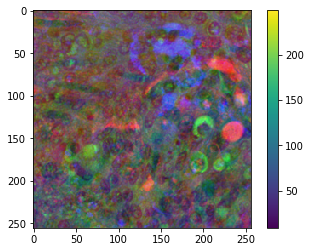

In [16]:
# Image merge code experiment ... FAIL ... 
img_part1 = dzImage.get_tile(level=level[1], address=(14,18))
img_part2 = dzImage.get_tile(level=level[1], address=(14,19))
img_part3 = dzImage.get_tile(level=level[1], address=(14,20))

print(img_part1.mode, img_part2.mode, img_part3.mode)

_image = Image.merge("RGB", (img_part1.convert('L'), img_part2.convert('L'), img_part3.convert('L')))

plt.imshow(_image)
plt.colorbar()
plt.show()

# Deep learning experiment plan 

* 샘플 tile 영상을 활용해 다음과 같은 실험을 진행할 예정

1. 목적: 특정 셀(cell) labeling 을 위한 셀 count solution

2. 전략 - 2단계 모델 학습
    
    2.1. Candidate detection (둥근 형채를 모두 검출 - 다른 색상을 지녔다는 점을 이용)
        ** Unsuperviesed method - with scikit-learn library
    
    2.2. FP reduction (둥근형체의 위양성 셀을 분류)
        ** Conventional CNN - using Pre-trained model with Keras

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


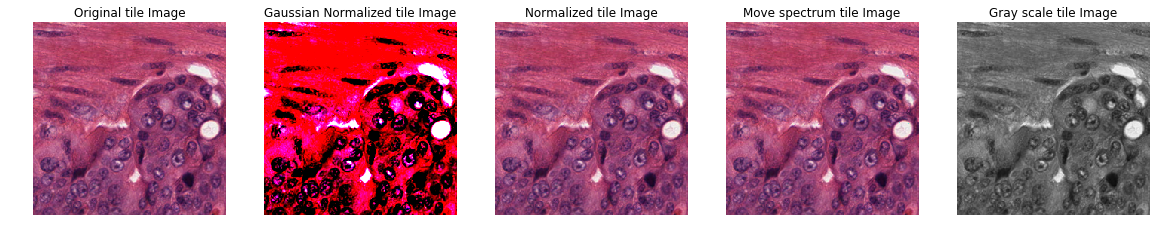

In [17]:
# Gaussian normalization 
mean = np.mean(img)
std = np.std(img)
gaussian_img = (img - mean) / std

# min / max normalization
norm_img = np.asarray(img) / 255.

# to improve thresholding finding 
# moving the underflow and overflow on the pixel spectrum
move_spect_img = norm_img.copy()

mean = np.mean(move_spect_img)
max = np.max(move_spect_img)
min = np.min(move_spect_img)
move_spect_img[move_spect_img >= max] = mean
move_spect_img[move_spect_img <=min] = mean

# Tile image display
fig, ax = plt.subplots(1,5, figsize=[20, 20])

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original tile Image')
# fig.colorbar(img, ax=ax[0])

ax[1].imshow(gaussian_img)
ax[1].axis('off')
ax[1].set_title('Gaussian Normalized tile Image')
# fig.colorbar(norm_img, ax=ax[1])

ax[2].imshow(norm_img)
ax[2].axis('off')
ax[2].set_title('Normalized tile Image')
# fig.colorbar(move_spect_img, ax=ax[2])

ax[3].imshow(move_spect_img)
ax[3].axis('off')
ax[3].set_title('Move spectrum tile Image')
# fig.colorbar(move_spect_img, ax=ax[2])

gray_img = img.convert('LA') # convert grayscale image
ax[4].imshow(gray_img)
ax[4].axis('off')
ax[4].set_title('Gray scale tile Image')
# fig.colorbar(norm_img, ax=ax[1])

plt.show()

(256, 256, 3)


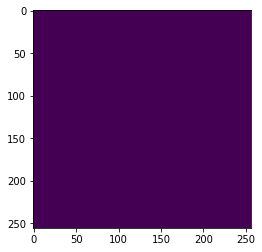

In [18]:
from scipy import ndimage

dilation_norm_img = ndimage.binary_dilation(norm_img)
print(dilation_norm_img.shape)
plt.imshow(dilation_norm_img[:,:,2])
plt.show()

### KMeans clustering experiment 1
* RGB 채널을 가진 컬러 tile 영상을 통해 실험을 진행함
* 찾아낸 mask 를 기반으로 후처리 과정을 통해 Cell Mask 를 만들어야 함을 확인함
    1. Gaussian filter for blur - 중앙에 염색된 부분을 가지고 있는 경우 
    2. Air bubble 과 cell 의 분류 - deep learning 을 통해 분류 
* 겹쳐있는 cell 을 분리 하기 위한 추가 알고리즘이 필요함
    * [skimage morphology opening] <http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.opening>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


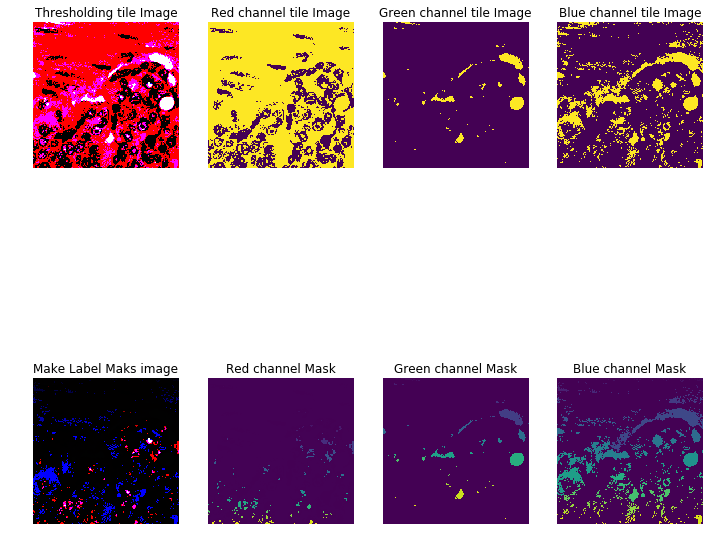

In [19]:
from skimage import measure
from skimage import morphology
from sklearn.cluster import KMeans

# edge-detection / 중심점 을 기반으로 
# using KMeans to seperate foreground (air / cell) and background (air, tissue) ? 
kmeans = KMeans(n_clusters=2).fit(np.reshape(norm_img, [np.prod(norm_img.shape), 1]))
centers = sorted(kmeans.cluster_centers_.flatten())

threshold = np.mean(centers)
threshold_img = np.where(norm_img > threshold, 1.0, 0.0) # threshold the image
print(threshold_img.shape)

label = measure.label(threshold_img) # thresholding label maks
label_r = measure.label(threshold_img[:,:,0]) # thresholding label maks in R channel
label_g = measure.label(threshold_img[:,:,1]) # thresholding label maks in G channel
label_b = measure.label(threshold_img[:,:,2]) # thresholding label maks in B channel

fig, ax = plt.subplots(2,4, figsize=[12,12])
[]
ax[0, 0].imshow(threshold_img)
ax[0, 0].set_title('Thresholding tile Image')
ax[0, 0].axis('off')

norm_img_red = threshold_img[:, :, 0].copy()
ax[0, 1].imshow(threshold_img[:, :, 0])
ax[0, 1].set_title('Red channel tile Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(threshold_img[:, :, 1])
ax[0, 2].set_title('Green channel tile Image')
ax[0, 2].axis('off')

ax[0, 3].imshow(threshold_img[:, :, 2])
ax[0, 3].set_title('Blue channel tile Image')
ax[0, 3].axis('off')

ax[1, 0].imshow(label)
ax[1, 0].set_title('Make Label Maks image')
ax[1, 0].axis('off')

ax[1, 1].imshow(label_r)
ax[1, 1].set_title('Red channel Mask')
ax[1, 1].axis('off')

ax[1, 2].imshow(label_g)
ax[1, 2].set_title('Green channel Mask')
ax[1, 2].axis('off')

ax[1, 3].imshow(label_b)
ax[1, 3].set_title('Blue channel Mask')
ax[1, 3].axis('off')

plt.show()

### KMeans clustering experiment 2
* Gray scale tile 영상을 통해 실험을 진행함
* Gray scale 영상에서 Air bubble 과 같이 튀는 값을 효과적으로 분리 가능함을 확인함

255 12
(256, 256, 2)


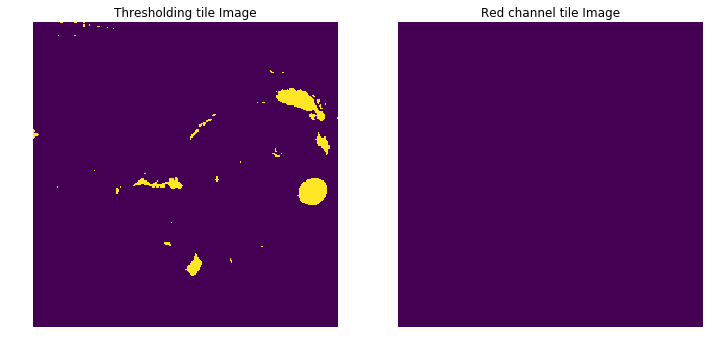

In [20]:
g_max = np.max(gray_img)
g_min = np.min(gray_img)

print(g_max, g_min)

# Gaussian normalization 
mean = np.mean(gray_img)
std = np.std(gray_img)
norm_g_img = (gray_img - mean) / std

# using grayscale image with KMeans clustering for cell detection
kmeans = KMeans(n_clusters=2).fit(np.reshape(norm_g_img, [np.prod(norm_g_img.shape), 1]))
centers = sorted(kmeans.cluster_centers_.flatten())

threshold = np.mean(centers)
threshold_img = np.where(norm_g_img > threshold, 1.0, 0.0) # threshold the image
print(threshold_img.shape)

label = measure.label(threshold_img) # thresholding label maks

fig, ax = plt.subplots(1,2, figsize=[12,12])

ax[0].imshow(threshold_img[:,:,0])
ax[0].set_title('Thresholding tile Image')
ax[0].axis('off')

ax[1].imshow(threshold_img[:, :, 1])
ax[1].set_title('Red channel tile Image')
ax[1].axis('off')

plt.show()

### KMeans clustering experiment 3
* 위 영상 결과에서 Red channel 에 대해 추가 작업 실험

[0.0, 1.0]
(256, 256)


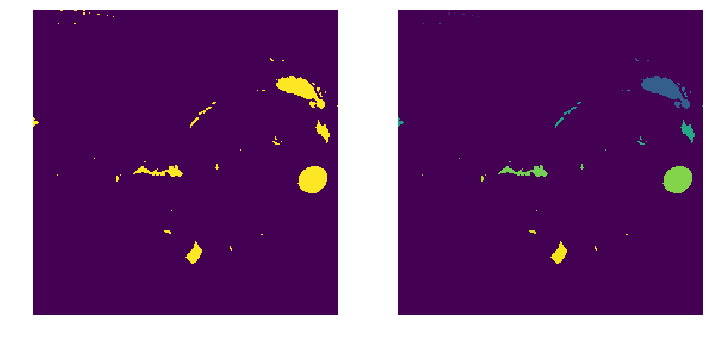

In [13]:
kmeans_r = KMeans(n_clusters=2).fit(np.reshape(norm_img_red, [np.prod(norm_img_red.shape), 1]))
centers = sorted(kmeans_r.cluster_centers_.flatten())
print(centers)

threshold_r = np.mean(centers)
threshold_img_r = np.where(threshold_img[:,:,0] > threshold_r, 1.0, 0.0) # threshold the image
print(threshold_img_r.shape)

label_rch = measure.label(threshold_img_r) # thresholding label maks

fig, ax = plt.subplots(1,2, figsize=[12,12])

ax[0].imshow(threshold_img_r)
ax[0].axis('off')
ax[1].imshow(label_rch)
ax[1].axis('off')

plt.show()

### Handles generation of tiles and metadata for a single image.
* queue is matching what ?!?!

In [12]:
class DeepZoomImageTiler(object):

    def __init__(self, dz, basename, format, associated, queue):
        self._dz = dz
        self._basename = basename
        self._format = format
        self._associated = associated
        self._queue = queue
        self._processed = 0

    def run(self):
        self._write_tiles()
        self._write_dzi()

    def _write_tiles(self):
        for level in range(self._dz.level_count):
            tiledir = os.path.join("%s_files" % self._basename, str(level))
            if not os.path.exists(tiledir):
                os.makedirs(tiledir)
            cols, rows = self._dz.level_tiles[level]
            for row in range(rows):
                for col in range(cols):
                    tilename = os.path.join(tiledir, '%d_%d.%s' % (
                                    col, row, self._format))
                    if not os.path.exists(tilename):
                        self._queue.put((self._associated, level, (col, row),
                                    tilename))
                    self._tile_done()

    def _tile_done(self):
        self._processed += 1
        count, total = self._processed, self._dz.tile_count
        if count % 100 == 0 or count == total:
            print("Tiling %s: wrote %d/%d tiles" % (
                    self._associated or 'slide', count, total),
                    end='\r', file=sys.stderr)
            if count == total:
                print(file=sys.stderr)

    def _write_dzi(self):
        with open('%s.dzi' % self._basename, 'w') as fh:
            fh.write(self.get_dzi())

    def get_dzi(self):
        return self._dz.get_dzi(self._format)
